In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
import time
import pandas as pd
import os
from glob import glob

from SyntheticDataGenerator_sharp import SyntheticDataGenerator_sharp
# from utils import c

ModuleNotFoundError: No module named 'pandas'

# Testing Data Generator

In [2]:
nx, ny = 256, 256
min_freq, max_freq= -100, 100.0
n_images = 1
num_bins = 12
data_gen = SyntheticDataGenerator_sharp(nx, ny, n_images, min_freq, max_freq)

In [3]:
freq_bins = np.linspace(min_freq, max_freq, num= 12)
freq_bins

array([-100.        ,  -81.81818182,  -63.63636364,  -45.45454545,
        -27.27272727,   -9.09090909,    9.09090909,   27.27272727,
         45.45454545,   63.63636364,   81.81818182,  100.        ])

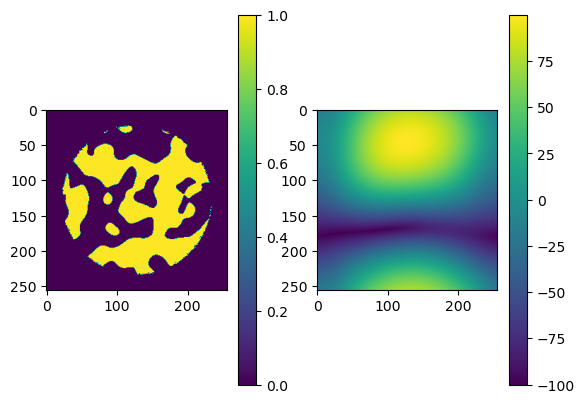

In [5]:
img = data_gen.create_composite_image()
freq_map = data_gen.generate_field_map()
binned_imgs = data_gen.create_freq_bin_image(img, freq_map, num_bins)

plt.subplot(121)
plt.imshow(img>0.5)
plt.colorbar()

plt.subplot(122)
plt.imshow(freq_map)
plt.colorbar()


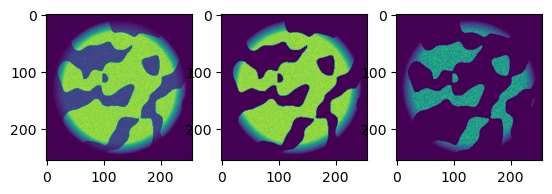

In [6]:
img = data_gen.create_composite_image_simple()
plt.subplot(131)
plt.imshow(img[0])

plt.subplot(132)
plt.imshow(img[1][...,0])

plt.subplot(133)
plt.imshow(img[1][...,1])


In [ ]:
binned_imgs = data_gen.create_freq_bin_image(img, freq_map, num_bins)

In [8]:
img[2].shape

(2, 256, 256)

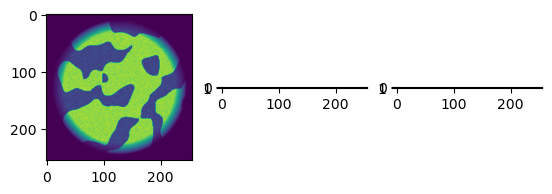

In [7]:
plt.subplot(131)
plt.imshow(img[0])

plt.subplot(132)
plt.imshow(img[2][...,0])

plt.subplot(133)
plt.imshow(img[2][...,1])


In [9]:
plt.imshow(summed_img)

NameError: name 'summed_img' is not defined

In [ ]:
plt.imshow(fmap_1)

In [10]:
tst_img = np.where(fmap_2 ==1, final_image, 0)
plt.imshow(tst_img)

NameError: name 'fmap_2' is not defined

In [ ]:
data_gen.save_data('test', img, freq_map, binned_imgs)

In [ ]:
test_load = np.load('test.npz')
test_load

In [ ]:
plt.imshow(images[0])

In [14]:
img = data_gen.create_composite_image()
freq_map = data_gen.generate_field_map()
binned_imgs = data_gen.create_freq_bin_image(img, freq_map, num_bins)
soft_binned_imgs = data_gen.create_soft_freq_bin_image(img,freq_map, min_freq, max_freq, num_bins-1)

In [9]:
soft_binned_imgs[0].shape

(256, 256, 12)

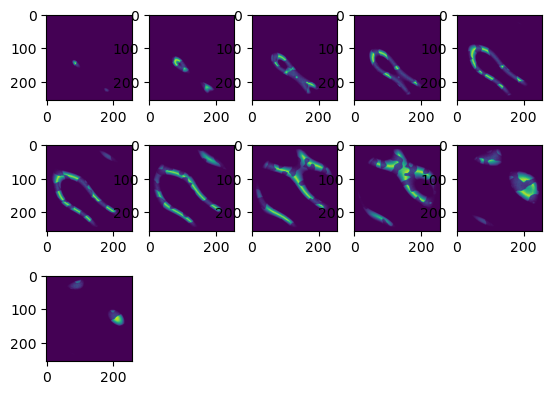

In [19]:
summed_img = np.zeros((binned_imgs.shape[0], binned_imgs.shape[1]))
# plt.subplot(3,5, soft_binned_imgs[0].shape[-1])
for i in range(num_bins-1):
    plt.subplot(3,5, i+1)
    plt.imshow(soft_binned_imgs[0][...,i])
    summed_img += soft_binned_imgs[0][...,i]

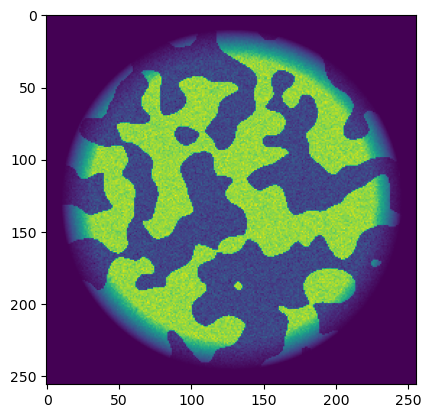

In [17]:
plt.imshow(summed_img)

# Generate Data

In [26]:
nx, ny = 256, 256
min_freq, max_freq= -5, 5
n_images = 1
num_bins =6
n_files = 100
save_dir = f"synthethic_imgs_{num_bins-1}bins_sharp_softbins_eval"

data_gen = SyntheticDataGenerator_sharp(nx, ny, n_images, min_freq, max_freq)


for i in range (n_files):
    # Define the directory and file name
    file_name = f"imgs_{i}.npz"
    # Create the directory if it doesn't exist
    os.makedirs(save_dir, exist_ok=True)
    # Construct the file path
    file_path = os.path.join(save_dir, file_name)


    img = data_gen.create_composite_image()
    freq_map = data_gen.generate_field_map()
    soft_binned_imgs = data_gen.create_soft_freq_bin_image(img,freq_map, min_freq, max_freq, num_bins-1)
    binned_imgs = soft_binned_imgs[0]

    data_gen.save_data(file_path, img, freq_map, binned_imgs) 
 

Data saved to 'synthethic_imgs_5bins_sharp_softbins_eval/imgs_0.npz'
Data saved to 'synthethic_imgs_5bins_sharp_softbins_eval/imgs_1.npz'
Data saved to 'synthethic_imgs_5bins_sharp_softbins_eval/imgs_2.npz'
Data saved to 'synthethic_imgs_5bins_sharp_softbins_eval/imgs_3.npz'
Data saved to 'synthethic_imgs_5bins_sharp_softbins_eval/imgs_4.npz'
Data saved to 'synthethic_imgs_5bins_sharp_softbins_eval/imgs_5.npz'
Data saved to 'synthethic_imgs_5bins_sharp_softbins_eval/imgs_6.npz'
Data saved to 'synthethic_imgs_5bins_sharp_softbins_eval/imgs_7.npz'
Data saved to 'synthethic_imgs_5bins_sharp_softbins_eval/imgs_8.npz'
Data saved to 'synthethic_imgs_5bins_sharp_softbins_eval/imgs_9.npz'
Data saved to 'synthethic_imgs_5bins_sharp_softbins_eval/imgs_10.npz'
Data saved to 'synthethic_imgs_5bins_sharp_softbins_eval/imgs_11.npz'
Data saved to 'synthethic_imgs_5bins_sharp_softbins_eval/imgs_12.npz'
Data saved to 'synthethic_imgs_5bins_sharp_softbins_eval/imgs_13.npz'
Data saved to 'synthethic_imgs

In [3]:
nx, ny = 256, 256
min_freq, max_freq= -5, 5
n_images = 1
num_bins =11
n_files = 100
save_dir = "synthethic_imgs_simple_fw"

data_gen = SyntheticDataGenerator_sharp(nx, ny, n_images, min_freq, max_freq)


for i in range (n_files):
    # Define the directory and file name
    file_name = f"imgs_{i}.npz"
    # Create the directory if it doesn't exist
    os.makedirs(save_dir, exist_ok=True)
    # Construct the file path
    file_path = os.path.join(save_dir, file_name)

    data = data_gen.create_composite_image_simple()
    img = data[0]
    freq_map = data[2]
    binned_imgs = data[1]
    data_gen.save_data(file_path, img, freq_map, binned_imgs) 
 

Data saved to 'synthethic_imgs_simple_fw/imgs_0.npz'
Data saved to 'synthethic_imgs_simple_fw/imgs_1.npz'
Data saved to 'synthethic_imgs_simple_fw/imgs_2.npz'
Data saved to 'synthethic_imgs_simple_fw/imgs_3.npz'
Data saved to 'synthethic_imgs_simple_fw/imgs_4.npz'
Data saved to 'synthethic_imgs_simple_fw/imgs_5.npz'
Data saved to 'synthethic_imgs_simple_fw/imgs_6.npz'
Data saved to 'synthethic_imgs_simple_fw/imgs_7.npz'
Data saved to 'synthethic_imgs_simple_fw/imgs_8.npz'
Data saved to 'synthethic_imgs_simple_fw/imgs_9.npz'
Data saved to 'synthethic_imgs_simple_fw/imgs_10.npz'
Data saved to 'synthethic_imgs_simple_fw/imgs_11.npz'
Data saved to 'synthethic_imgs_simple_fw/imgs_12.npz'
Data saved to 'synthethic_imgs_simple_fw/imgs_13.npz'
Data saved to 'synthethic_imgs_simple_fw/imgs_14.npz'
Data saved to 'synthethic_imgs_simple_fw/imgs_15.npz'
Data saved to 'synthethic_imgs_simple_fw/imgs_16.npz'
Data saved to 'synthethic_imgs_simple_fw/imgs_17.npz'
Data saved to 'synthethic_imgs_simple_